In [17]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.10.1


## Importing Required Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [4]:
random_seed = 42

In [5]:
curr_path = os.getcwd()


In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    curr_path + '/train/',
    batch_size=32,
    seed = random_seed,
    image_size=(224, 224)
)

Found 250 files belonging to 5 classes.


In [9]:
# load validation dataset 
valid_ds = tf.keras.utils.image_dataset_from_directory(
    curr_path + '/val/',
    batch_size=32,
    seed = random_seed,
    image_size=(224, 224)
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    curr_path + '/test/',
    batch_size=32,
    seed = random_seed,
    image_size=(224, 224)
)


Found 50 files belonging to 5 classes.
Found 100 files belonging to 5 classes.


In [10]:
class_names = train_ds.class_names
print(class_names)

['brain', 'butterfly', 'ewer', 'helicopter', 'ketch']


### visualize the data


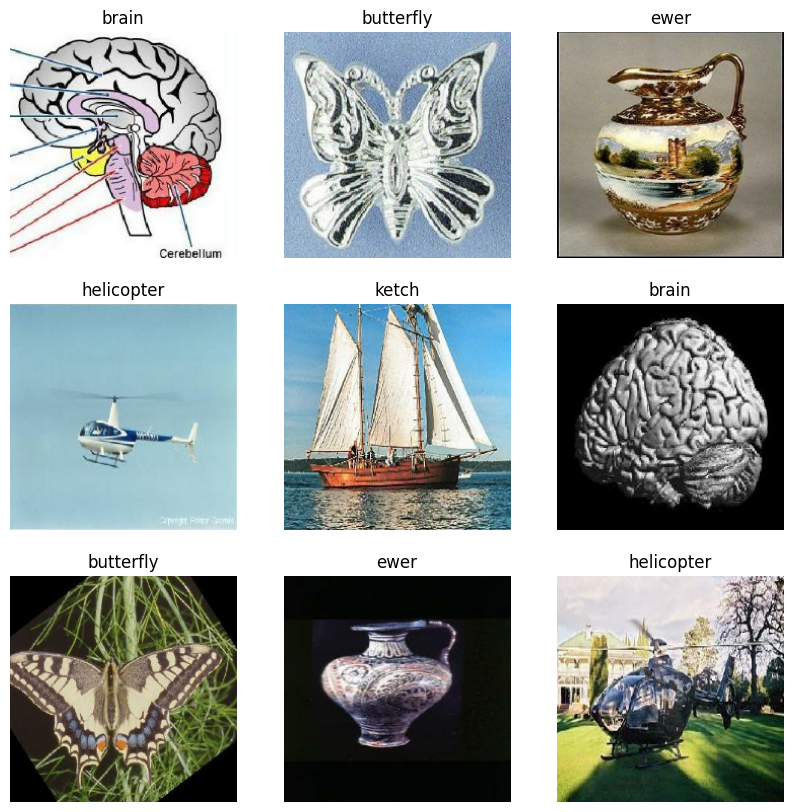

In [14]:
image_super = [] # pairs of images and corresponding labels (will be used for plotting and other experiments)
plt.figure(figsize=(10, 10))
for i in range(9):
    label_idx = i%5
    for batch_images, batch_labels in train_ds:
        mask = (batch_labels == label_idx)
        if tf.reduce_any(mask): #checks if any value in mask tensor is true
            indices = tf.argmax(mask)
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(batch_images[indices].numpy().astype("uint8"))
            plt.title(class_names[batch_labels[indices]])
            plt.axis("off")
            image_super.append([batch_images[indices], batch_labels[indices]])
            break  

### Regeneration of visualized training samples

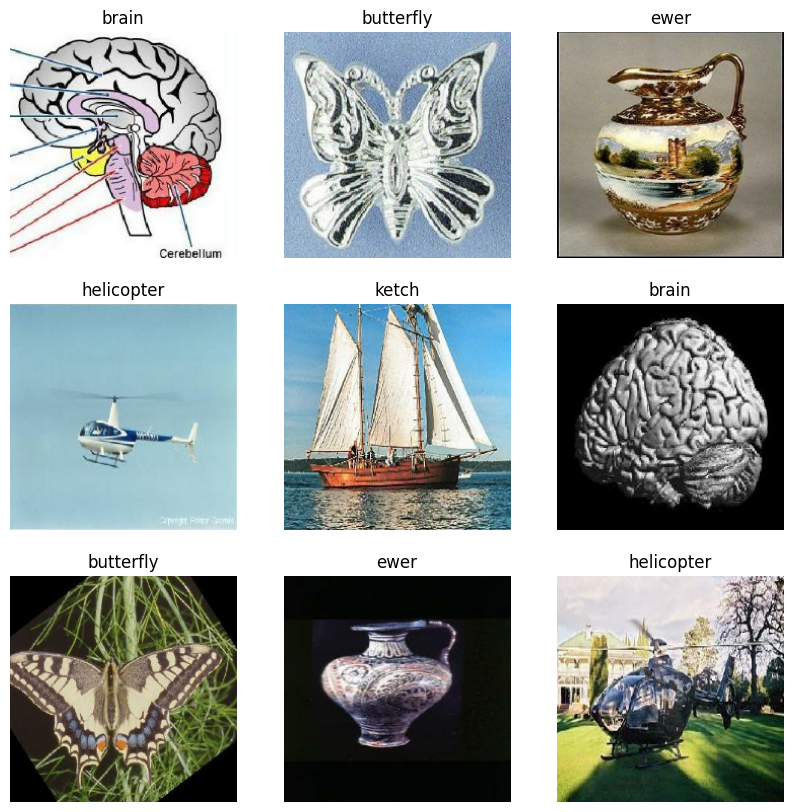

In [15]:
plt.figure(figsize=(10,10))
for i in range(len(image_super)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_super[i][0].numpy().astype("uint8"))
    plt.title(class_names[image_super[i][1]])
    plt.axis("off")

## Load the VGG19 Model in Keras

In [47]:
from keras.utils.vis_utils import plot_model

In [42]:
train_ds_pre = tf.keras.applications.vgg19.preprocess_input(image_super[0][0])

In [45]:
vgg19 = tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    classes=1000,
    classifier_activation="softmax"
)

574710816/574710816 [==============================] - 110s 0us/step


In [46]:
print(vgg19.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [50]:
plot_model(vgg19, to_file='vgg19.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
